# Design of a Stepped impedance low-pass filter

## SPECS
- __Maximally Flat__
- Stepped Impedance:
   - $Z_{Low} = 10 \Omega$
   - $Z_{High} = 150 \Omega$ 
- Substrate:
   - GIL Technologies GML-1000
      - $H = 0.762$
      - $E_r = 3.2$
      - $\tan_d = 0.003$
- Order of the Filter: __7__ $^{nth}$ 
- Cut-off Frequency: $f_c=2.0\ GHz$



$$ \left\lvert\frac{w}{w_c}\right\rvert - 1 = 0.1N ,\ N = 7\ e\ w_c = 2\cdot\pi\cdot\ 2\ GHz$$

$$ \frac{w}{2\cdot\pi\cdot\ 2\ GHz} = 0.7 + 1 $$

$$ w = 3.4\ GHz$$ 

In [ ]:
!pip install numpy
import numpy as np
z_high = 150
z_low = 10
H = 0.762
E_r = 3.2
tan_d = 0.003
n = 7
f_c = 2e9
w_c = f_c * 2 * np.pi
R_0 = 50
lightspeed = 3e8 #approximation in vacuum should be changed based on substrate 
wavelength = lightspeed/ f_c

In [3]:

attenuation_w  =  ((n/10)+1 )* w_c #Quando a atenuação e maior que 20dB 
attenuation_f  =  ((n/10)+1 )* f_c #Quando a atenuação e maior que 20dB 

print(f"Freq Attenuation is more than 20dB: {attenuation_f:e} Hz")
print(f"                                  : {attenuation_w:e} rad/s")


Freq Attenuation is more than 20dB: 3.400000e+09 Hz
                                  : 2.136283e+10 rad/s


Since our filter is maximally flat we will use the values from the table provided in slide 17 of _Microwave Filter Design 2_

|$N$| $g_0$| $g_1$| $g_2$| $g_3$| $g_4$| $g_5$| $g_6$| $g_7$| $g_8$|
|---|------|------|------|------|------|------|------|------|------|
|...|  ... |  ... |  ... |  ... |  ... |  ... |  ... |  ... |  ... |
| 7 |1.0000|0.4450|1.2470|1.8019|2.0000|1.8019|1.2470|0.4450|1.0000|


In [4]:
g_list = [1.0000, 0.4450, 1.2470, 1.8019, 2.0000, 1.8019, 1.2470, 0.4450, 1.0000]
C_list = []
L_list = []
i = 0
for g in g_list:
    if(i <= 0 or i==n+1):
        print(" ")
        #print("Do Nothing") 
    elif(i % 2 == 0 and i > 0):
        #print("par")
        L_list.append((R_0*g)/w_c)
    elif(i % 2 == 1 and i > 0):
        #print("impar")
        C_list.append(g/(R_0*w_c))
    #print(g)
    #print(f"i={i}")
    i+=1

i = 1
for c in C_list:
    print(f"C{i} = {c:.3e} F")
    i+=1
i=1
print(" ")
for l in L_list:
    print(f"L{i} = {l:.3e} H")
    i+=1
print(" ")
beta = (2*np.pi)/wavelength
print(f"{beta = :.3f}")
print(f"{wavelength = :.3f}")
microstrip_l_list = []
microstrip_betal_list = []
i = 0
for g in g_list:
    if(i % 2 == 0 and i >= 1 and i <= n):
        #print(f"Bobine")    
        microstrip_l_list.append(((g*R_0)/z_high)/beta)
        microstrip_betal_list.append((g*R_0)/z_high)
    if(i % 2 == 1 and i >= 1 and i <= n):
        #print("Condensador")
        microstrip_l_list.append(((g*z_low)/R_0)/beta)
        microstrip_betal_list.append((g*z_low)/R_0)
    i+=1

# Speed of wave in substrate is needed for this calculation
#i=1
#print(" ")
#for l in microstrip_l_list:
#    print(f"Lengh {i} = {l:.3e} m")
#    i+=1

i=1
print(" ")
for l in microstrip_betal_list:
    if(i % 2 == 1): string = f"Capacitor {i}  Z_0={z_low} " 
    else: string = f"Inductor  {i}  Z_0={z_high}"
    print(f"{string} Angle = {l:.3f} rads or {l * (180/np.pi):.3f} degrees")
    i+=1

 
 
C1 = 7.082e-13 F
C2 = 2.868e-12 F
C3 = 2.868e-12 F
C4 = 7.082e-13 F
 
L1 = 4.962e-09 H
L2 = 7.958e-09 H
L3 = 4.962e-09 H
 
beta = 41.888
wavelength = 0.150
 
Capacitor 1  Z_0=10  Angle = 0.089 rads or 5.099 degrees
Inductor  2  Z_0=150 Angle = 0.416 rads or 23.816 degrees
Capacitor 3  Z_0=10  Angle = 0.360 rads or 20.648 degrees
Inductor  4  Z_0=150 Angle = 0.667 rads or 38.197 degrees
Capacitor 5  Z_0=10  Angle = 0.360 rads or 20.648 degrees
Inductor  6  Z_0=150 Angle = 0.416 rads or 23.816 degrees
Capacitor 7  Z_0=10  Angle = 0.089 rads or 5.099 degrees


In [4]:
!pip install scikit-rf
!pip install matplotlib



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


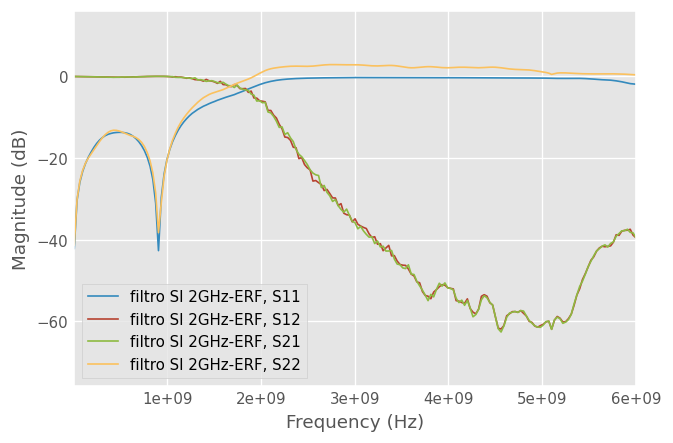

In [8]:
#Plot VNA Result

import skrf as rf
ntwk = rf.Network('data/filtro SI 2GHz-ERF.s2p')
s = ntwk.s
%matplotlib inline
from pylab import *
rf.stylely()
ntwk.plot_s_db()